In [1]:
# Name :- LUXSHAN S.
# Index No :- 190364C
# Github Link :- https://github.com/luxshan21/Image_Processing_Works_190364C.git

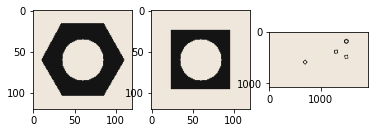

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

Threshold value for the hexnut_template image :  20.0
Threshold value for the squarenut_template image :  20.0
Threshold value for the conveyor_f100 image :  20.0


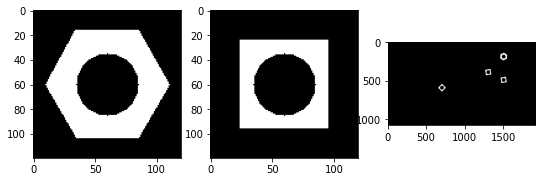

In [13]:
th_hexnut_template, img_hexnut = cv.threshold(cv.cvtColor(hexnut_template, cv.COLOR_BGR2GRAY),0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU) # simple thresholding + Otsu thresholding
th_squarenut_template, img_squarenut = cv.threshold(cv.cvtColor(squarenut_template, cv.COLOR_BGR2GRAY),0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
th_conveyor_f100, img_conveyor = cv.threshold(cv.cvtColor(conveyor_f100, cv.COLOR_BGR2GRAY),0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

fig, ax = plt. subplots(1,3,figsize=(9,9))
print("Threshold value for the hexnut_template image : ",th_hexnut_template)
print("Threshold value for the squarenut_template image : ",th_squarenut_template)
print("Threshold value for the conveyor_f100 image : ",th_conveyor_f100)
ax[0].imshow(img_hexnut, cmap='gray')
ax[1].imshow(img_squarenut, cmap='gray')
ax[2].imshow(img_conveyor, cmap='gray')
plt.show()

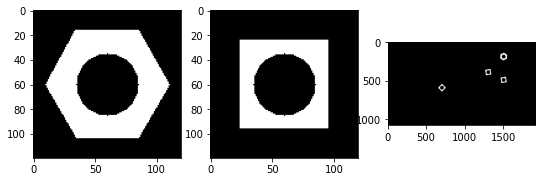

In [14]:
kernel = np.ones((3,3),dtype=np.uint8) 
closing_hexnut_template = cv.morphologyEx(img_hexnut, cv.MORPH_CLOSE, kernel) # obtaining the morphological closing of thresholded images using kernal
closing_squarenut_template = cv.morphologyEx(img_squarenut, cv.MORPH_CLOSE, kernel)
closing_conveyor_f100 = cv.morphologyEx(img_conveyor, cv.MORPH_CLOSE, kernel)

fig, ax = plt. subplots(1,3,figsize=(9,9))
ax[0].imshow(img_hexnut, cmap='gray')
ax[1].imshow(img_squarenut, cmap='gray')
ax[2].imshow(img_conveyor, cmap='gray')
plt.show()

In [4]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.
